# Keseluruhan Code

# Import Library

In [1]:
import pandas as pd
import numpy as np
#Import Library untuk Tokenisasi
import string 
import re #regex library

# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# Read Data PTA

In [2]:
dataPTA = pd.read_csv('pta-manajemen.csv')

In [3]:
dataPTA.head(10)

,Judul,Penulis,Dosen 1,Dosen 2,Abstrak
0,ANALISIS TINGKAT RISIKO KREDIT \r\nPADA PD. BP...,Penulis : Iwan Kurniawan Gomes,Dosen Pembimbing I : Drs. Ec. Makhmud Zulkifli...,"Dosen Pembimbing II :Echsan Gani, S.E., M.SI",Hasil dari penelitian ini dari perhitungan Cre...
1,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,Penulis : Toni Budianto,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Fathor AS, S.E., MM.",ABSTRAK\r\n\r\nTujuan penelitian ini adalah un...
2,PENGARUH TIPE KEPEMIMPINAN TERHADAP PRESTASI K...,Penulis : Dharma Abidin Syah,Dosen Pembimbing I : Drs. Ec. Mudji Kuswinarno...,"Dosen Pembimbing II :Faidal SE, MM","ABSTRAK\r\n\tDharma Abidin Syah,Kesimpulan: (1..."
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,Penulis : Aththaariq,"Dosen Pembimbing I : Dr.RM Moch Wispandono,.S....",Dosen Pembimbing II :Dr. Muhammad Alkirom Wild...,"Abstrak\r\n\r\nAththaariq, Pengaruh Kompetensi..."
4,Pengaruh Iklan di televisi terhadap keputusan ...,Penulis : Muhammad Sholeh,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Suyono, S.E.,M.S.M","Muhammad Sholeh, Pengaruh Iklan Di Televisi Te..."
5,PENGARUH PERILAKU KONSUMEN TERHADAP KEPUTUSAN ...,Penulis : Haryono Arifin,"Dosen Pembimbing I : Dr. Ir Nurita Andriani, MM","Dosen Pembimbing II :Nirma Kurriwati, S.P., M.Si","ABSTRAK\r\nHaryono Arifin, Pengaruh Perilaku K..."
6,PENGARUH SELF EFFICACY TERHADAP PRESTASI AKADE...,Penulis : ISTIB SYAROH,Dosen Pembimbing I : Dr. Dra. Hj. Iriani Ismai...,Dosen Pembimbing II :Drs. Ec. Mudji Kuswinarno...,Tujuan dari penelitian ini adalah untuk menget...
7,PENGARUH RELATIONSHIP MARKETING TERHADAP LOYAL...,Penulis : ARYA SUBAYU,"Dosen Pembimbing I : Dr.H.Pribanus Wantara.,Dr...","Dosen Pembimbing II :Hadi Purnomo, SE, MM",Tujuan penelitian ini adalah untuk mengetahui ...
8,ANALISIS FAKTOR-FAKTOR YANG MENENTUKAN PREFERE...,Penulis : ulfiyatun Mutohharoh,"Dosen Pembimbing I : Drs. Mohamad Tambrin, MM.","Dosen Pembimbing II :Yustina Chrismardani, S.S...","Ulfiyatun Mutohharoh, “Analisis Faktor-faktor ..."
9,ANALISA KUALITAS PELAYANAN JASA UNTUK MENGUKUR...,Penulis : Farid Ardyansyah,"Dosen Pembimbing I : Dr. H. Pribanus Wantara, ...","Dosen Pembimbing II :Hadi Purnomo, SE., MM",ABSTRAK\r\nTujuan penelitian ini adalah untuk ...


# Case Folding

In [4]:

# gunakan fungsi Series.str.lower() pada Pandas
dataPTA['Abstrak'] = dataPTA['Abstrak'].str.lower()

print('Case Folding Result : \n')

#cek hasil case fold
print(dataPTA['Abstrak'].head(5))
print('\n\n\n')

Case Folding Result : 

0    hasil dari penelitian ini dari perhitungan cre...
1    abstrak\r\n\r\ntujuan penelitian ini adalah un...
2    abstrak\r\n\tdharma abidin syah,kesimpulan: (1...
3    abstrak\r\n\r\naththaariq, pengaruh kompetensi...
4    muhammad sholeh, pengaruh iklan di televisi te...
Name: Abstrak, dtype: object






# Removal

In [5]:
#Import Library untuk Tokenisasi
import string 
import re #regex library

# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_PTA_special(text):
    # menghapus tab, new line, dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_PTA_special)

#menghapus nomor
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_number)

#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_punctuation)

#menghapus spasi leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_whitespace_LT)

#menghapus spasi tunggal dan ganda
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_whitespace_multiple)

# menghapus kata 1 abjad
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_singl_char)

# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataPTA['abstrak_token'] = dataPTA['Abstrak'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(dataPTA['abstrak_token'].head())

Tokenizing Result : 

0    [hasil, dari, penelitian, ini, dari, perhitung...
1    [abstrak, tujuan, penelitian, ini, adalah, unt...
2    [abstrak, dharma, abidin, syahkesimpulan, terd...
3    [abstrak, aththaariq, pengaruh, kompetensi, do...
4    [muhammad, sholeh, pengaruh, iklan, di, televi...
Name: abstrak_token, dtype: object


# STOPWORD 

In [6]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

# Mengubah List ke dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

#aStopwording
dataPTA['abstrak_stop'] = dataPTA['abstrak_token'].apply(stopwords_removal) 


print(dataPTA['abstrak_stop'].head(20))

0     [hasil, penelitian, perhitungan, credit, risk,...
1     [abstrak, tujuan, penelitian, mengidentifikasi...
2     [abstrak, dharma, abidin, syahkesimpulan, peng...
3     [abstrak, aththaariq, pengaruh, kompetensi, do...
4     [muhammad, sholeh, pengaruh, iklan, televisi, ...
5     [abstrak, haryono, arifin, pengaruh, perilaku,...
6     [tujuan, penelitian, pengaruh, variabel, self,...
7     [tujuan, penelitian, pengaruh, variabel, relat...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [abstrak, tujuan, penelitian, menganalisis, at...
10    [devi, kurniawati, pengaruh, earning, share, n...
11    [abstrak, tujuan, penelitian, harga, kualitas,...
12    [abstrak, penelitian, bertujuan, pengaruh, fak...
13    [tujuan, penlitian, variabel, iklan, berdasark...
14    [tujuan, penelitian, pengaruh, variabel, brand...
15    [farid, pengaruh, periklanan, media, televisi,...
16    [tujuan, penelitian, kualitas, pelayanan, keha...
17    [tujuan, penelitian, pengaruh, sikap, pars

In [7]:
dataPTA.head()

,Judul,Penulis,Dosen 1,Dosen 2,Abstrak,abstrak_token,abstrak_stop
0,ANALISIS TINGKAT RISIKO KREDIT \r\nPADA PD. BP...,Penulis : Iwan Kurniawan Gomes,Dosen Pembimbing I : Drs. Ec. Makhmud Zulkifli...,"Dosen Pembimbing II :Echsan Gani, S.E., M.SI",hasil dari penelitian ini dari perhitungan cre...,"[hasil, dari, penelitian, ini, dari, perhitung...","[hasil, penelitian, perhitungan, credit, risk,..."
1,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,Penulis : Toni Budianto,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Fathor AS, S.E., MM.",abstrak tujuan penelitian ini adalah untuk men...,"[abstrak, tujuan, penelitian, ini, adalah, unt...","[abstrak, tujuan, penelitian, mengidentifikasi..."
2,PENGARUH TIPE KEPEMIMPINAN TERHADAP PRESTASI K...,Penulis : Dharma Abidin Syah,Dosen Pembimbing I : Drs. Ec. Mudji Kuswinarno...,"Dosen Pembimbing II :Faidal SE, MM",abstrak dharma abidin syahkesimpulan terdapat ...,"[abstrak, dharma, abidin, syahkesimpulan, terd...","[abstrak, dharma, abidin, syahkesimpulan, peng..."
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,Penulis : Aththaariq,"Dosen Pembimbing I : Dr.RM Moch Wispandono,.S....",Dosen Pembimbing II :Dr. Muhammad Alkirom Wild...,abstrak aththaariq pengaruh kompetensi dosen t...,"[abstrak, aththaariq, pengaruh, kompetensi, do...","[abstrak, aththaariq, pengaruh, kompetensi, do..."
4,Pengaruh Iklan di televisi terhadap keputusan ...,Penulis : Muhammad Sholeh,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Suyono, S.E.,M.S.M",muhammad sholeh pengaruh iklan di televisi ter...,"[muhammad, sholeh, pengaruh, iklan, di, televi...","[muhammad, sholeh, pengaruh, iklan, televisi, ..."


# stemming

In [8]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# sfungsi stemmer
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataPTA['abstrak_stop']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# stemming pada dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataPTA['abstrak_stem'] = dataPTA['abstrak_stop'].swifter.apply(get_stemmed_term)
print(dataPTA['abstrak_stem'])

1210
------------------------
hasil : hasil
penelitian : teliti
perhitungan : hitung


credit : credit
risk : risk


ratio : ratio
menunjukan : tunjuk
npl : npl
pd : pd
bpr : bpr
bank : bank
daerah : daerah


lamongan : lamongan
mengalami : alami
penurunan : turun
tingkat : tingkat
resiko : resiko
kesimpulan : simpul


dikatagorikan : dikatagorikan
berdasarkan : dasar
ketentuan : tentu
indonesia : indonesia
syarat : syarat
maksimal : maksimal
kunci : kunci
non : non


performing : performing
loan : loan
abstrak : abstrak
tujuan : tuju
mengidentifikasi : identifikasi


variabelvariabel : variabelvariabel
mempengaruhi : pengaruh
kepuasan : puas
konsumen : konsumen
simultan : simultan
parsial : parsial
metode : metode
kuantitatif : kuantitatif
populasi : populasi
depot : depot


barokah : barokah
prambon : prambon
pelayanan : layan
sampel : sampel
responden : responden
teknik : teknik


accidental : accidental
sampling : sampling
analisis : analisis
regresi : regresi
linier : linier
berganda : ganda
variabel : variabel
independen : independen
bukti : bukti
fisik : fisik


kehandalan : kehandalan
jaminan : jamin
berpengaruh : pengaruh
signifikan : signifikan
daya : daya
tanggap : tanggap
empati : empati
dependen : dependen
pengaruh : pengaruh
kualitas : kualitas
dharma : dharma
abidin : abidin


syahkesimpulan : syahkesimpulan
tipe : tipe
kepemimpinan : pimpin


autoritarian : autoritarian
laissezfaire : laissezfaire
demokratis : demokratis
prestasi : prestasi
kerja : kerja
pegawai : pegawai
kantor : kantor
kecamatan : camat


pangarengan : pangarengan
kabupaten : kabupaten
sampang : sampang
uji : uji
anova : anova
nilai : nilai


fhitung : fhitung
ftabel : ftabel
kontribusi : kontribusi


autoritariansecara : autoritariansecara
pegawaidikantor : pegawaidikantor
hitung : hitung
tabel : tabel
laissezfairesecara : laissezfairesecara
koefisien : koefisien
determinasi : determinasi
bebas : bebas
lainya : lai
dominan : dominan
dikantor : kantor


aththaariq : aththaariq
kompetensi : kompetensi
dosen : dosen
kinerja : kerja
universitas : universitas
trunojoyo : trunojoyo
madura : madura
dibawah : bawah
bimbingan : bimbing


drrm : drrm
moch : moch
wispandonosems : wispandonosems
dr : dr
muhammad : muhammad
alkirom : alkirom


wildansemsi : wildansemsi
bertujuan : tuju
menganalisis : analis
pedagogik : pedagogik
profesional : profesional
sosial : sosial
kepribadian : pribadi
terikat : ikat
data : data
primer : primer
diperoleh : oleh


penyebaran : sebar
kuesioner : kuesioner
tersertifikasi : sertifikasi
aktif : aktif
pengambilan : ambil
judgmental : judgmental
disimpulkan : simpul


koefisiensi : koefisiensi
dipengaruhi : pengaruh
perubahan : ubah
diteliti : teliti
sisanya : sisa
memiliki : milik
signifikansi : signifikansi
beta : beta


kepribadiandan : kepribadiandan
sholeh : sholeh
iklan : iklan
televisi : televisi
keputusan : putus
memakai : pakai
kartu : kartu
seluler : seluler
xl : xl
geger : geger
bambang : bambang
setiyo : setiyo


pambudi : pambudi
mm : mm
suyono : suyono
msm : msm
masyarakat : masyarakat
bangkalan : bangkal
terkumpul : kumpul
alat : alat
bantu : bantu


software : software
spss : spss
pengujian : uji
hipotesis : hipotesis
isi : isi
pesan : pesan
struktur : struktur
format : format
sumber : sumber


keywords : keywords
haryono : haryono
arifin : arifin
perilaku : perilaku
pembelian : beli
produk : produk
honda : honda
merek : merek
vario : vario
studi : studi


dealler : dealler
surya : surya
agung : agung
motor : motor
dealer : dealer
manakah : mana
kebudayaan : budaya
pribadi : pribadi
psikologis : psikologis
pendekatan : dekat
pengamatan : amat
langsung : langsung


dianalisa : dianalisa
dijadikan : jadi
dianalisis : analis
versi : versi
self : self
efficacy : efficacy


magnitude : magnitude
generality : generality
strength : strength
akademik : akademik
mahasiswa : mahasiswa
berprestasi : prestasi
dimana : mana
diambil : ambil


mengikuti : ikut
mawapres : mawapres
orang : orang
diterima : terima
temuan : temu


teridiri : teridiri
faktor : faktor
relationship : relationship
marketing : marketing
keuntungan : untung
komitmen : komitmen
komunikasi : komunikasi
kebenaran : benar
loyalitas : loyalitas
nasabah : nasabah


adira : adira
finance : finance
wilayah : wilayah
surabaya : surabaya
barat : barat
negatif : negatif


ulfiyatun : ulfiyatun
mutohharoh : mutohharoh
faktorfaktor : faktorfaktor
menentukan : tentu
preferensi : preferensi
belanja : belanja
online : online


fashion : fashion
mahasiwa : mahasiwa
fakultas : fakultas
ekonomi : ekonomi


journal : journal
of : of
economics : economics
program : program
manajemen : manajemen
drs : drs


mohamad : mohamad
tambrin : tambrin


yustina : yustina
crismardani : crismardani
ssi : ssi


internet : internet
sistem : sistem
informasi : informasi
global : global
berbasis : bas
komputer : komputer
perlahanlahan : perlahanlahan


menggeser : geser
budaya : budaya
konvensional : konvensional
praktis : praktis
modern : modern
berbelanja : belanja
dirilis : rilis
detikcom : detikcom
dibeli : beli
dipertimbangkan : timbang


menetukan : menetukan
berketergantungan : gantung
interdependent : interdependent
variable : variable


jenis : jenis
deskriptif : deskriptif
statistic : statistic


konfirmatori : konfirmatori
didapatkan : dapat
kmo : kmo
item : item
menghasilkan : hasil
rendah : rendah
klasifikasi : klasifikasi
miserablenilai : miserablenilai
statistik : statistik
ukuran : ukur


kecukuperatan : kecukuperatan
hubungan : hubung
layak : layak
harga : harga
alternatif : alternatif
atribut : atribut
kepentingan : penting
pengguna : guna
sepeda : sepeda
jembatan : jembatan
suramadu : suramadu
diagram : diagram


kartesius : kartesius
importance : importance
performance : performance
enam : enam
fokus : fokus
utama : utama
ketidak : tidak
puasan : puas
lampu : lampu
penerangan : terang
terpasang : pasang
menyala : nyala
malam : malam
petugas : tugas
jasa : jasa
marga : marga


berpenampilan : tampil
rapi : rapi
kondisi : kondisi
jalan : jalan
mulus : mulus
berlubang : lubang
tiket : tiket
teliti : teliti
uang : uang
kembalian : kembali
pt : pt
asuransi : asuransi
kecelakaan : celaka
patroli : patroli
sungguhsungguh : sungguhsungguh
memperhatikan : perhati


mogokban : mogokban
bocordll : bocordll


devi : devi
kurniawati : kurniawati


earning : earning
share : share
net : net
profit : profit
margin : margin
debt : debt
to : to


asset : asset
return : return
on : on
equity : equity
saham : saham


perusahaan : usaha
otomotif : otomotif
komponennya : komponen
terdaftar : daftar
bei : bei
periode : periode
gatot : gatot
heru : heru
prajoto : prajoto


prasetyo : prasetyo
nugroho : nugroho
spi : spi
purposive : purposive
instrumen : instrumen
asumsi : asumsi
klasik : klasik


menguji : uji
square : square
besarnya : besar
positif : positif
deterjen : deterjen


rinso : rinso
anti : anti
noda : noda
adjusted : adjusted
berdomisili : domisili
desa : desa
telang : telang
stres : stres


terhdap : terhdap
disiplin : disiplin
stressor : stressor
lingkungan : lingkung
individu : individu
kelompok : kelompok
organisasi : organisasi


katakunci : katakunci
penlitian : penlitian
konsep : konsep


aida : aida
helm : helm
ink : ink
kota : kota
berusaha : usaha
pengumpulan : kumpul
kepustakaan : pustaka
skala : skala
likert : likert
mengukur : ukur
validitas : validitas
reliabilitas : reliabilitas


attention : attention
interest : interest
desire : desire


action : action
brand : brand
image : image
citra : citra


flashdisk : flashdisk
toshiba : toshiba
berlandaskan : landas
filsafat : filsafat
positivisme : positivisme
ditetapkan : tetap
utm : utm


corporate : corporate
user : user


product : product
and : and
consumer : consumer
purchasing : purchasing


decisions : decisions
farid : farid
periklanan : iklan
media : media


shampo : shampo
pantene : pantene
dungkek : dungkek


sumenep : sumenep
softwere : softwere


vareabel : vareabel
shampoo : shampoo
rakyat : rakyat
persero : persero
tbk : tbk
cabang : cabang
diajukan : aju
disusun : susun


pelanggan : langgan
bri : bri
menggunaka : menggunaka
systematic : systematic


random : random
objek : objek
pemilik : milik
debit : debit
britama : britama
man : man


steel : steel
bertempat : tempat
tinggal : tinggal
bersamasama : bersamasama
meningkatkan : tingkat
aspek : aspek
menumbuhkan : tumbuh
percaya : percaya
hati : hati
setia : setia
service : service


quality : quality
customer : customer
satisfaction : satisfaction
sikap : sikap
pasta : pasta


gigi : gigi
pepsodent : pepsodent
norma : norma
subyektif : subyektif
wawancara : wawancara
kuci : kuci


subyekti : subyekti
kecerdasan : cerdas
emosional : emosional
burneh : burneh
tanah : tanah
merah : merah


galis : galis
blega : blega


memilki : memilki
memahami : paham
menciptakan : cipta
suasana : suasana
nyaman : nyaman
diharapkan : harap
peningkatan : tingkat
kerjanya : kerja
meneliti : teliti


intrapersonal : intrapersonal
interpersonal : interpersonal
membuktikan : bukti
linear : linear
bantuan : bantu


kuncikecerdasan : kuncikecerdasan
rasio : rasio
profitabilitas : profitabilitas
industry : industry
makanan : makan
minuman : minum
masingmasing : masingmasing
npm : npm
roa : roa


investment : investment
roi : roi
roe : roe
eps : eps
dividend : dividend
payout : payout
dpr : dpr
industri : industri
bursa : bursa
efek : efek
persial : sial
retun : retun
dilaksanakan : laksana


menyebarkan : sebar


klasiksedangkan : klasiksedangkan
keunggulan : unggul
asosiasi : asosiasi
kekuatan : kuat
keunikan : uni
minat : minat
beli : beli
jamu : jamu
tolak : tolak
angin : angin
sido : sido
muncul : muncul
pasar : pasar
manyar : manyar
respondenteknik : respondenteknik


respondenuntuk : respondenuntuk
bauran : baur
pemasaran : pasar
distribusi : distribusi
promosi : promosi
petis : petis
ikan : ikan
tuna : tuna
hdiya : hdiya
kelurahan : lurah


banyuanyar : banyuanyar
kosumen : kosumen


meguji : meguji
berdasar : dasar
model : model
sistematis : sistematis
ditribusi : ditribusi
unsur : unsur


pengirim : kirim
komunikator : komunikator
penerima : terima
komunikan : komunikan
umpan : umpan
produktifitas : produktifitas
negeri : negeri
sipil : sipil
dinas : dinas
pendidikian : kian
pendidikan : didik
proporsional : proporsional


membagikan : bagi
riset : riset
perpustakaan : pustaka
pengolahan : olah
perangkat : perangkat
lunak : lunak
reabilitas : reabilitas
menerangkan : terang
dimasukkan : masuk
varibel : varibel


kominkator : kominkator
sigifikan : sigifikan
peranan : peran
upaya : upaya
produktivitas : produktivitas


penyedap : sedap
masako : masako
populasinya : populasi
ibuibu : ibuibu


robatal : robatal
membeli : beli
mengkonsumsi : konsumsi
kemasan : kemas
pelabelan : label
layanan : layan
pelengkap : lengkap
simpulan : simpul
terikatnya : ikat
susu : susu
cair : cair
indomilk : indomilk
swalayan : swalayan
tom : tom


jerry : jerry
mix : mix
rokok : rokok
mild : mild
socah : socah


segi : segi
menjalani : jalan
pekerjaan : kerja
mencampur : campur
adukkan : aduk
permasalahan : masalah
dirumah : rumah
rumah : rumah
tangga : tangga
membawa : bawa
kedalam : dalam
keluarga : keluarga
sulit : sulit
penuh : penuh
beban : beban
berat : berat
berdampak : dampak
pekerjaannya : kerja
tugas : tugas
dilakukannya : laku
pelatihan : latih
jangka : jangka
lembur : lembur
konflik : konflik
peran : peran
ganda : ganda


pekerjaankeluarga : pekerjaankeluarga
keluargapekerjaan : keluargapekerjaan
perawat : awat
wanita : wanita
rs : rs
syamrabu : syamrabu


purpossive : purpossive
kinerjanya : kerja
salah : salah
langkah : langkah
diperhatikan : perhati
bergerak : gerak
bidang : bidang
produksi : produksi
barang : barang
kopontren : kopontren


sidogiri : sidogiri
bisnis : bisnis
eceran : ecer
jual : jual
mengambil : ambil
pemebelian : beli
elemenelemen : elemenelemen
ekuitas : ekuitas
kesadaran : sadar


awareness : awareness
assocations : assocations
kesan : kesan
perceived : perceived


loyalty : loyalty
handphone : handphone
blackberry : blackberry


madurateknik : madurateknik
maduravariabel : maduravariabel
kemampuan : mampu
es : es
krim : krim


walls : walls
diolah : olah
datanya : data
martabak : martabak


hawaii : hawaii
strategi : strategi
positioning : positioning
ciri : ciri
penggunaan : guna


nokia : nokia
strategy : strategy
characteristics : characteristics


price : price
usage : usage
users : users


consumers : consumers
munculnya : muncul
lahirnya : lahir
mengemis : emis
disebabkan : sebab
anak : anak
memilih : pilih
profesi : profesi


pengemis : emis
periaku : peria
kebiasaan : biasa
kehidupan : hidup
seharihari : seharihari
kamal : kamal
kab : kab
memprihatinkan : prihatin
indikator : indikator
etnografis : etnografis
persepsi : persepsi
sosialisasi : sosialisasi
menyebabkan : sebab


berprofesi : profesi
modus : modus
operandi : operandi
bentuk : bentuk
praktek : praktek
jaringan : jaring


indicator : indicator
behavioral : behavioral
sociology : sociology
tingkah : tingkah


laku : laku
akibatnya : akibat
teory : teory
exchange : exchange


social : social
kekecewaan : kecewa
manusia : manusia
bersumber : sumber


KeyboardInterrupt: 

In [9]:
dataPTA.head()

,Judul,Penulis,Dosen 1,Dosen 2,Abstrak,abstrak_token,abstrak_stop,abstrak_stem
0,ANALISIS TINGKAT RISIKO KREDIT \r\nPADA PD. BP...,Penulis : Iwan Kurniawan Gomes,Dosen Pembimbing I : Drs. Ec. Makhmud Zulkifli...,"Dosen Pembimbing II :Echsan Gani, S.E., M.SI",hasil dari penelitian ini dari perhitungan cre...,"[hasil, dari, penelitian, ini, dari, perhitung...","[hasil, penelitian, perhitungan, credit, risk,...","[hasil, teliti, hitung, credit, risk, ratio, t..."
1,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,Penulis : Toni Budianto,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Fathor AS, S.E., MM.",abstrak tujuan penelitian ini adalah untuk men...,"[abstrak, tujuan, penelitian, ini, adalah, unt...","[abstrak, tujuan, penelitian, mengidentifikasi...","[abstrak, tuju, teliti, identifikasi, variabel..."
2,PENGARUH TIPE KEPEMIMPINAN TERHADAP PRESTASI K...,Penulis : Dharma Abidin Syah,Dosen Pembimbing I : Drs. Ec. Mudji Kuswinarno...,"Dosen Pembimbing II :Faidal SE, MM",abstrak dharma abidin syahkesimpulan terdapat ...,"[abstrak, dharma, abidin, syahkesimpulan, terd...","[abstrak, dharma, abidin, syahkesimpulan, peng...","[abstrak, dharma, abidin, syahkesimpulan, peng..."
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,Penulis : Aththaariq,"Dosen Pembimbing I : Dr.RM Moch Wispandono,.S....",Dosen Pembimbing II :Dr. Muhammad Alkirom Wild...,abstrak aththaariq pengaruh kompetensi dosen t...,"[abstrak, aththaariq, pengaruh, kompetensi, do...","[abstrak, aththaariq, pengaruh, kompetensi, do...","[abstrak, aththaariq, pengaruh, kompetensi, do..."
4,Pengaruh Iklan di televisi terhadap keputusan ...,Penulis : Muhammad Sholeh,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Suyono, S.E.,M.S.M",muhammad sholeh pengaruh iklan di televisi ter...,"[muhammad, sholeh, pengaruh, iklan, di, televi...","[muhammad, sholeh, pengaruh, iklan, televisi, ...","[muhammad, sholeh, pengaruh, iklan, televisi, ..."


# TF Process

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
berita = []
for data in dataPTA['abstrak_stem']:
    isi = ''
    for term in data:
        isi += term + ' '
    berita.append(isi)

vectorizer.fit(berita)

# Encode the Document
vector = vectorizer.transform(berita)

a= vectorizer.get_feature_names_out()

count = vector.toarray()
df = pd.DataFrame(data=count,columns = [a])

from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tf = tfidf.fit_transform(vectorizer.fit_transform(berita)).toarray()

dfp =pd.DataFrame(data=tf, index=list(range(1,len(tf[:,1])+1, )),columns=[a])
dfp

,abidin,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,adnya,...,wilayah,wildansemsi,windows,wispandonosems,xl,xterhadap,yakin,yamaha,yustina,zscore
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.024704,0.0,0.069266,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.049981,0.008529,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.009930,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.058194,0.0,0.058194,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.339700,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
62,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
63,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.567218,0.0,0.0,0.0,0.0,0.0
64,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfp)
    distortions.append(kmeanModel.inertia_)

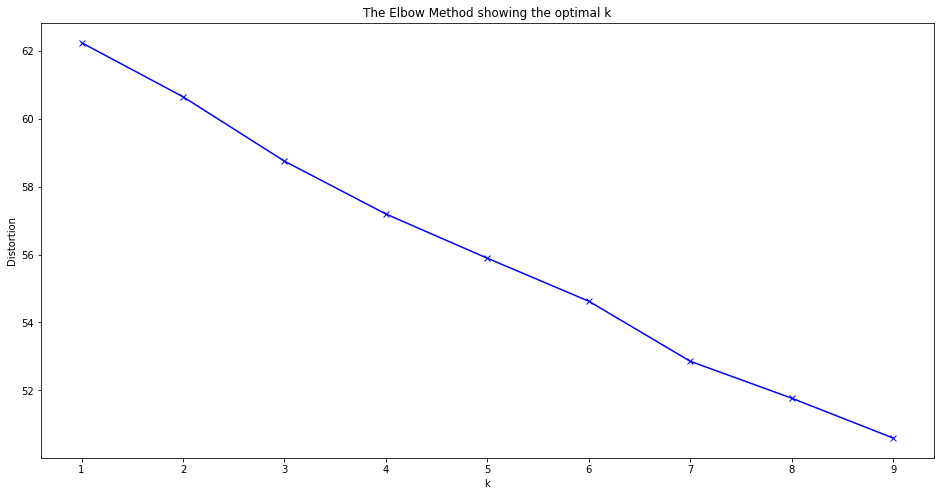

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=4, random_state=42)
# fit the model
kmeans.fit(dfp)
# store cluster labels in a variable
clusters = kmeans.labels_
kmeans.labels_

array([2, 1, 0, 0, 1, 1, 0, 1, 3, 1, 2, 3, 0, 1, 1, 1, 3, 3, 0, 2, 1, 3,
       3, 0, 1, 3, 3, 0, 3, 1, 1, 3, 1, 2, 0, 0, 0, 3, 0, 3, 1, 3, 0, 3,
       1, 2, 1, 3, 2, 1, 3, 2, 0, 2, 3, 3, 2, 2, 1, 1, 2, 0, 3, 1, 2])

In [14]:
df_pca['cluster']=clusters
df_pca

NameError: name 'df_pca' is not defined

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)

In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "0",1:"1",2:"2",3:"3"}
# apply mapping
dataPTA['cluster'] = dataPTA['cluster'].map(cluster_map)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=dataPTA, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()